# Chapter 1

Load a simple local image, simple as `load` with the path.

In [ ]:
using Images

In [ ]:
img_path = "../sample-images/cats-3061372_640.jpg"
sample = nothing

if isfile(img_path)
    sample = load(img_path)
else
    info("Error!")
end

Loading from a URL works via `download` and `load`

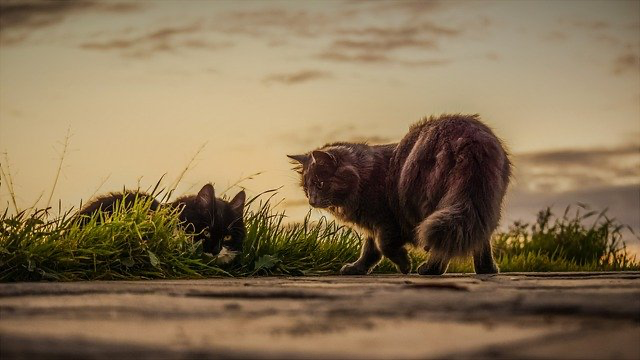

In [3]:
image_url = "https://cdn.pixabay.com/photo/2018/01/04/18/58/cats-3061372_640.jpg?attachment"
downloaded_image_path = download(image_url, "../sample-images/downloads/ch1_img_1")
downloaded_image = load(downloaded_image_path)

Reading a batch of images in a loop, using `readdir` and `filter`

In [4]:
directory = "../sample-images/";
files = readdir(directory)
directory_images = filter(x->occursin(r"\.(jpg|png|gif){1}$", x), files);

In [5]:
count = 0
for image_name in directory_images
    image_path = joinpath(directory, image_name);
    image = load(image_path);
    count+=1
end
print(count, " Images Loaded")

20 Images Loaded

Saving images happens through the imaginatively named `save` function.

In [6]:
save("../sample-images/downloads/save_cats_image.jpg", downloaded_image) #jpg
save("../sample-images/downloads/save_cats_image.png", downloaded_image) #png

### Test images

The package TestImages gives several free out-of-box in various sizes, formats, colors. Images can be shown via `imshow` in ImageView (will open a new window in non-jupyter), or in Jupyter just calling the image.

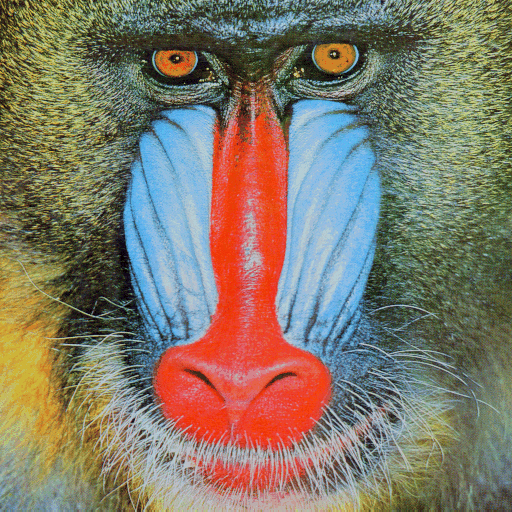

In [7]:
using TestImages, ImageView
img = testimage("mandril_color")
save("../sample-images/downloads/mandril_color.png",img)
img

## Basic Manipulation

### Cropping

Working with cat image, consider it just an array of values, so to crop it to just one cat, you just need to slice the array. Start with a 360x640 image (we know from calling `size`, and then crop that down to an a priori known size

In [8]:
source_image = load("../sample-images/cats-3061372_640.jpg");
size(source_image)

(360, 640)

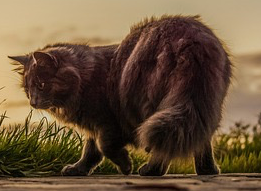

In [9]:
cropped = source_image[100:290, 280:540];
cropped

Alternatively (maybe better) is the `view` function, which points to the original array rather than allocating new memory, however this doesn't play well with Jupyter, only in a new window.

In [10]:
# In other environments:
# view(source_image, 100:290, 280:540)

###  Resizing

Use the `imresize` function

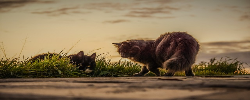

In [11]:
resized = imresize(source_image, (100,250))
resized

Consider converting to a square:

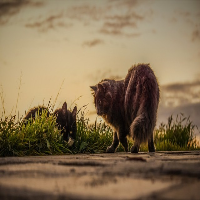

In [12]:
resized = imresize(source_image, (200,200))
resized

### Scaling

Scaling is resizing but keeping original proportions, approach via percentage.

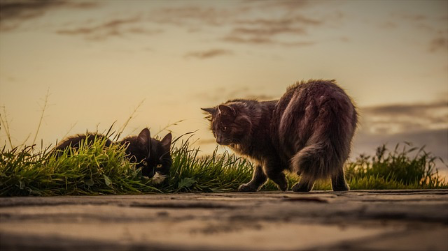

In [13]:
scale = 0.7
new_size = trunc.(Int, size(source_image) .* scale)
rescaled = imresize(source_image, new_size)
rescaled

It's common to scale to a given width and adapt height or vice-versa. In this case, just derive values

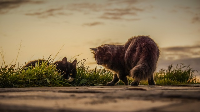

In [14]:
desired_width = 200
scale = desired_width / size(source_image)[2]
new_size = trunc.(Int, size(source_image) .* scale)
rescaled = imresize(source_image, new_size)
rescaled

The very specific case of scaling by two-fold is built into JuliaImages, `restrict`

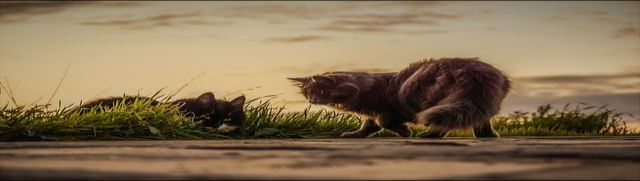

In [15]:
two_fold_height = restrict(source_image, 1) # for height parameter
two_fold_height

### Rotation

Rotation is done via the `CoordinateTransformations` package. Note that rotations other than multiples of 90 degrees result in black backgrounds.

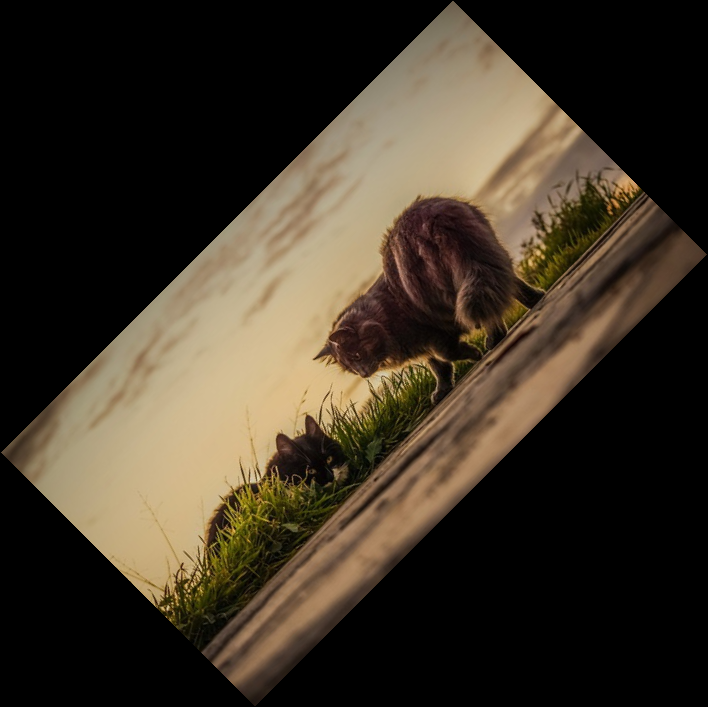

In [16]:
using CoordinateTransformations, ImageTransformations, Rotations

tfm = LinearMap(RotMatrix(-pi/4))
rotated_img = warp(source_image, tfm)
rotated_img